In [165]:
import random
import csv
import matplotlib.pyplot as plt

valores=[38.9,46.9,46.40,376.8,44.46,72.8,39.9,80.47,39.2,43.8]

#crea poblaci+on de 100 elementos verificando posibles repiticiones 
def CrearPoblacion(): 
    x,c=[],[]
    for i in range(100):
        j,c=0,[]
        while j<10:
            gen=round(random.random(), 4)
            if (gen in c == True): continue
            c.append(gen)
            j+=1
        x.append(c)
    return x

#Selecciona aleatoriamente que poblacion le pertenece a la función 1 y 2
def DecidirFuncion(f1,f2,pob):
    i=0
    while(i<50):
        a,b=random.randint(0,99),random.randint(0,99)
        if (a==b or pob[a] in f1==True or pob[a] in f2==True or pob[b] in f1 ==True or pob[b] in f2==True):
            continue
        f1.append(pob[a])
        f2.append(pob[b])
        i+=1


In [166]:
#Evalua la Función 1
def F1(x):
    fx=0
    for i in range(10):
        fx=fx+x[i]*valores[i]
    return fx

#Evalua la función 2
def F2(x):
    fx,fx1=0,0
    covarianza=LeerCSV()
    for i in range(10):
        for j in range(10):
            fx1+=x[i]*x[j]*float(covarianza[i][j])
        fx+=fx1
    return fx

#Lee los datos del CSV
def LeerCSV():
    acciones=[]
    fila=[]
    archivo=open('acciones.csv','r')
    for linea in archivo.readlines():
        fila=linea.split(",")
        acciones.append(fila)
    return acciones

In [167]:
#Realiza operaciones con la función 1
def Maximizar(x,GActual):
    poblacion=EvaluarFuncion(x,1)
    CalcularAptitud(poblacion)
    BubbleSort(poblacion)
    padres=Seleccion()
    CruzaBinarioS(poblacion, padres,1)
    MutacionNoUniforme(poblacion,GActual,1)
    return poblacion

#Realiza operación de Función 2
def Minimizar(x,GActual):
    poblacion=EvaluarFuncion(x,2)
    CalcularAptitud(poblacion)
    BubbleSort(poblacion)
    padres=Seleccion()
    CruzaBinarioS(poblacion, padres,2)
    MutacionNoUniforme(poblacion,GActual,2)
    return poblacion


In [168]:
#Realiza la evaluacion de F1 y F2
def EvaluarFuncion(x,f):
    poblacion,fx,apt=[],[],[]
    for i in range(50):
        if (f==1):
            fx.append(F1(x[i]))
        else:
            fx.append(F2(x[i]))
        apt.append(-1)
    poblacion.append(x)
    poblacion.append(fx)
    poblacion.append(apt)
    return poblacion
#Calcula la aptitud de cada población
def CalcularAptitud(poblacion):
    sumatoria=0
    for i in range(50):
        sumatoria+=poblacion[1][i]
    for i in range(50):
        poblacion[2][i]=poblacion[1][i]/sumatoria

#Ordena los datos de la población
def BubbleSort(poblacion):
    j=0
    c=True
    while c==True:
        c=False
        for i in range(49-j):
            if poblacion[1][i]<poblacion[1][i+1]:
                poblacion[0][i],poblacion[0][i+1]=poblacion[0][i+1],poblacion[0][i]
                poblacion[1][i],poblacion[1][i+1]=poblacion[1][i+1],poblacion[1][i]
                poblacion[2][i],poblacion[2][i+1]=poblacion[2][i+1],poblacion[2][i]
                c=True
        j+=1

In [169]:
#Seleccion por Torneo
def Seleccion():
    G1,G2,i=[],[],0
    while (i<3):
        a=random.randint(0,49)
        b=random.randint(0,49)
        if a in G1==True or a==b or b in G1==True or a in G2==True:
            continue
        G1.append(a)
        G2.append(b)
        i+=1
    G1.sort()
    G2.sort()
    return G1[0],G2[0]

#Realiza la Cruza de los datos 
def CruzaBinarioS(poblacion, padres,f):
    C1=poblacion[0][padres[0]]
    C2=poblacion[0][padres[1]]
    ch1,ch2=[],[]
    u=random.random()
    nx=60
    if (u<0.5): B=(2*u)**(1/(nx+1))
    else: B=(1/(2*(1-u)))**(1/(nx+1))
    for i in range(len(C1)):
        CH1=0.5*((1+B)*C1[i]+(1-B)*C2[i])
        CH2=0.5*((1-B)*C1[i]+(1+B)*C2[i])
        ch1.append(CH1)
        ch2.append(CH2)
    VerificarMejora(ch1,ch2,poblacion,f)

#Verifica mejoras, tras cruza
def VerificarMejora(ch1,ch2,poblacion,f):
    if f==1:
        CH1,CH2=F1(ch1),F1(ch2)
    else:
        CH1,CH2=F2(ch1),F2(ch2)
    if CH1>poblacion[1][49]:
        poblacion[0][49]=ch1
        poblacion[1][49]=CH1
        BubbleSort(poblacion)
        CalcularAptitud(poblacion)
    if CH2>poblacion[1][49]:
        poblacion[0][49]=ch2
        poblacion[1][49]=CH2
        BubbleSort(poblacion)
        CalcularAptitud(poblacion)        

In [186]:
def MutacionNoUniforme(poblacion,GActual,f):
    SeleccionCromosoma=random.randint(0,49)
    CromosomaMutar=poblacion[0][SeleccionCromosoma]
    for i in range(len(CromosomaMutar)):
        x=MaxMinGen(poblacion[0],i)
        fg=FG(GActual)
        r=random.random()
        if (r<0.5):g1=(CromosomaMutar[i]+((x[0]-x[1])*fg))
        else: g1=(CromosomaMutar[i]-((x[0]+x[1])*fg))
        CromosomaMutar[i]=g1
    if f==1:
        M=F1(CromosomaMutar)
    else:
        M=F2(CromosomaMutar)
    if M>poblacion[1][49]:
        poblacion[0][49]=CromosomaMutar
        poblacion[1][49]=M
    BubbleSort(poblacion)
    CalcularAptitud(poblacion)
    
def FG(G):
    b=5
    fg=(random.random()*(1-G/100))**b
    return fg
    
def MaxMinGen(cromosomas,gen):
    genes=[]
    for i in range(len(cromosomas)):
        c=cromosomas[i]
        for i in range(len(c)):
            if (i==gen):
                genes.append(c[i])
    return max(genes),min(genes)


In [187]:
def Remplazo(pob1,pob2):
    j=0
    for i in range(11,50):
        pob1[0][i],pob2[0][i]=pob2[0][j],pob1[0][j]
        pob1[1][i],pob2[1][i]=pob2[1][j],pob1[1][j]
        pob1[2][i],pob2[2][i]=pob2[2][j],pob1[2][j]
        j+=1

In [188]:
def Generacion(px1,px2,mg1,mg2, gActual):
    poblacion1=Maximizar(px1,gActual)
    poblacion2=Minimizar(px2,gActual)
    Remplazo(poblacion1, poblacion2)
    mg1.append(poblacion1[1][0])
    mg2.append(poblacion2[1][0])

In [189]:
def GraficaConvergencia(x,g1,g2):
    plt.plot(x,g1, color="green", linewidth=2, linestyle="-", label="F1 Maximizar")
    plt.plot(x, g2, color="blue",  linewidth=2, linestyle="-", label="F2 Minimizar")
    plt.legend(loc='upper left')
    plt.xticks(x)
    plt.xlabel('Generaciones')
    plt.ylabel('Fx')
    plt.show

Mejor solución F1: 765.9350206154764
Mejor Solucion F2: 5.412605451583217


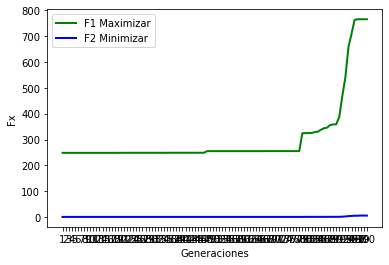

In [190]:
def main():
    gmax1,gmax2,x=[],[],[]
    gActual=1
    px=CrearPoblacion()
    px1,px2=[],[]
    DecidirFuncion(px1,px2,px)
    while gActual<=100:
        Generacion(px1,px2,gmax1,gmax2,gActual)
        gActual+=1
    for i in range(1,101):
        x.append(i)
    gmax1.sort()
    gmax2.sort()
    print(f"Mejor solución F1: {gmax1[99]}")
    print(f"Mejor Solucion F2: {gmax2[99]}")
    GraficaConvergencia(x,gmax1,gmax2)
    
main()